In [1]:
# necessary package for basic libraries and visulization
import numpy as np 
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#from plotnine import *

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# column CLIENTNUM contain Uunique identifier for the customer - not useful for model building
# Last two column contains not useful information
# We are going to drop these 3 columns
df = df.drop(columns = [ 'CLIENTNUM',
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [5]:
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
df_churn=df[df.Attrition_Flag=='Attrited Customer']

In [15]:
df_churn.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,5,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,2,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,1,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,2,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000


In [113]:
behv_col = ['Months_on_book', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
            'Total_Relationship_Count', 'Credit_Limit',  
            'Avg_Utilization_Ratio', 'Total_Trans_Ct',
            'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']

In [128]:
behv_col_kmeans = ['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1']

In [129]:
df_churn[behv_col_kmeans].head()

,Total_Trans_Ct,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1
21,16,0,0.600
39,16,605,0.143
51,19,808,0.900
54,15,0,0.364
61,15,0,0.500


In [130]:
# First, we need to scale the data
sd = StandardScaler()
df_churn_behv_kmeans = sd.fit_transform(df_churn[behv_col_kmeans])
#df_behv_sub = sd.fit_transform(df[behv_col_sub])
df_churn_behv_kmeans

array([[-1.98666001, -0.73045407,  0.20113418],
       [-1.98666001, -0.07363241, -1.81399922],
       [-1.78067196,  0.14675569,  1.52397887],
       ...,
       [ 1.03449807, -0.73045407,  1.16240132],
       [ 1.17182344, -0.73045407,  0.73909102],
       [ 1.10316076,  1.39851664,  0.41719882]])

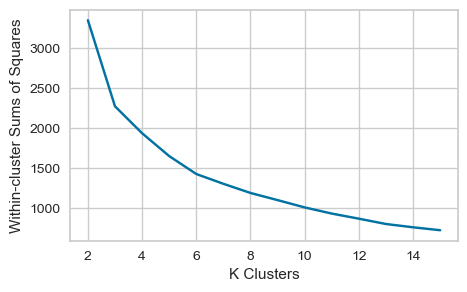

In [131]:
# try elbow method for optimal K
wcss = []
for i in range(2,16):
    km = KMeans(n_clusters = i, n_init = 10, max_iter = 500, random_state=2022)
    km.fit(df_churn_behv_kmeans)
    wcss.append(km.inertia_)

fig = plt.figure(figsize=(5,3))
plt.plot(range(2,16), wcss)
plt.xlabel('K Clusters')
plt.ylabel('Within-cluster Sums of Squares')
plt.show()

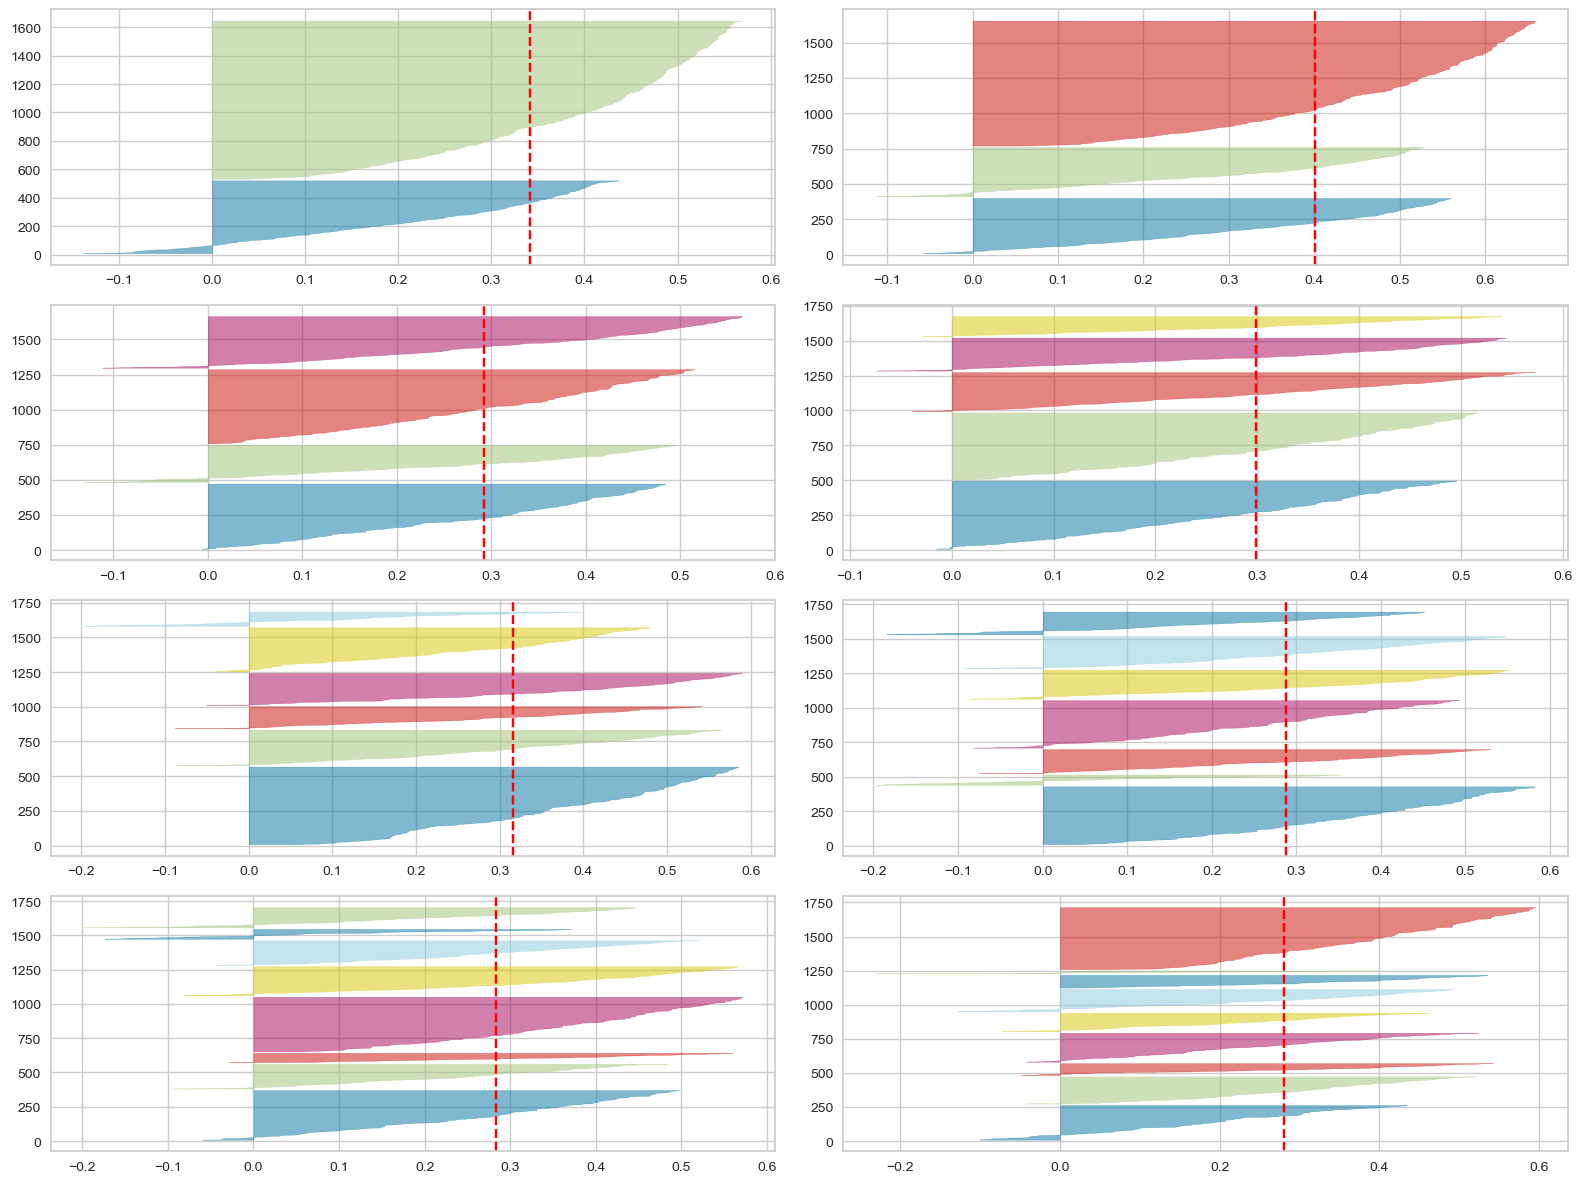

In [132]:
# The divmod() method takes two numbers as arguments and 
# returns their quotient and remainder in a tuple.
# for example result = divmod(8, 3), then result = (2,2)
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(4, 2, figsize=(16,12))
for i in [2,3,4,5,6,7,8,9]:
    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters = i, n_init = 10, max_iter = 500, random_state=2022)
    q, mod = divmod(i, 2)
   
    #Create SilhouetteVisualizer instance with KMeans instance. Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_churn_behv_kmeans)
plt.tight_layout()

In [133]:
# selected k (k=6)
km = KMeans(n_clusters = 4, n_init = 10, max_iter = 500, random_state=2022)
cluster_labels = km.fit_predict(df_churn_behv_kmeans)

In [134]:
df_churn['customer_group'] = cluster_labels
df_churn.head()

/var/folders/h6/8dbynfrj3m5gmc3w4h17pvs80000gn/T/ipykernel_74036/2459872483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['customer_group'] = cluster_labels


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,customer_group
21,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,...,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0
39,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,5,...,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0
51,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,2,...,1,1438.3,808,630.3,0.997,705,19,0.900,0.562,2
54,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,1,...,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0
61,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,2,...,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0


In [135]:
df_churn['customer_group'].value_counts()

2    529
0    464
3    368
1    266
Name: customer_group, dtype: int64

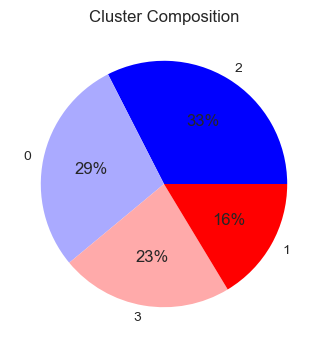

In [137]:
fig, axs = plt.subplots(figsize=(8,4))
ax = df_churn['customer_group'].value_counts().plot.pie(title='Cluster Composition', autopct='%1.0f%%', cmap='bwr')
plt.title=False
ax.set_ylabel('')
plt.show()

## <span style="color:blue">7.3.4 Clusters chracterization

In [138]:
df_churn_behv = sd.fit_transform(df_churn[behv_col])

In [139]:
df_behv_cluster = pd.DataFrame(df_churn_behv, columns=behv_col)
df_behv_cluster['customer_group'] = cluster_labels
df_behv_cluster

,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Relationship_Count,Credit_Limit,Avg_Utilization_Ratio,Total_Trans_Ct,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,customer_group
0,1.645048,0.341025,0.025370,-0.811297,-0.736619,-0.614560,-1.986660,-0.730454,1.641656,0.201134,0
1,2.543158,1.452943,0.025370,1.090691,-0.027939,-0.323308,-1.986660,-0.073632,1.664927,-1.813999,0
2,0.490337,0.341025,-1.809152,-0.811297,-0.736619,1.511198,-1.780672,0.146756,1.408945,1.523979,2
3,-0.022869,0.341025,0.025370,-1.445293,0.839475,-0.614560,-2.055323,-0.730454,1.613731,-0.839504,0
4,-0.151170,1.452943,0.942631,-0.811297,2.901276,-0.614560,-2.055323,-0.730454,0.319855,-0.239814,0
...,...,...,...,...,...,...,...,...,...,...,...
1622,1.388446,0.341025,0.025370,0.456695,0.717177,0.036028,0.553859,2.002141,-2.458721,-0.178081,3
1623,-1.434183,-0.770894,0.025370,0.456695,-0.424418,1.318291,1.652462,1.642789,0.510678,0.567121,3
1624,-0.022869,0.341025,0.942631,1.090691,-0.299921,-0.614560,1.034498,-0.730454,0.580492,1.162401,1
1625,-0.022869,0.341025,0.025370,0.456695,-0.313998,-0.614560,1.171823,-0.730454,-0.741310,0.739091,1


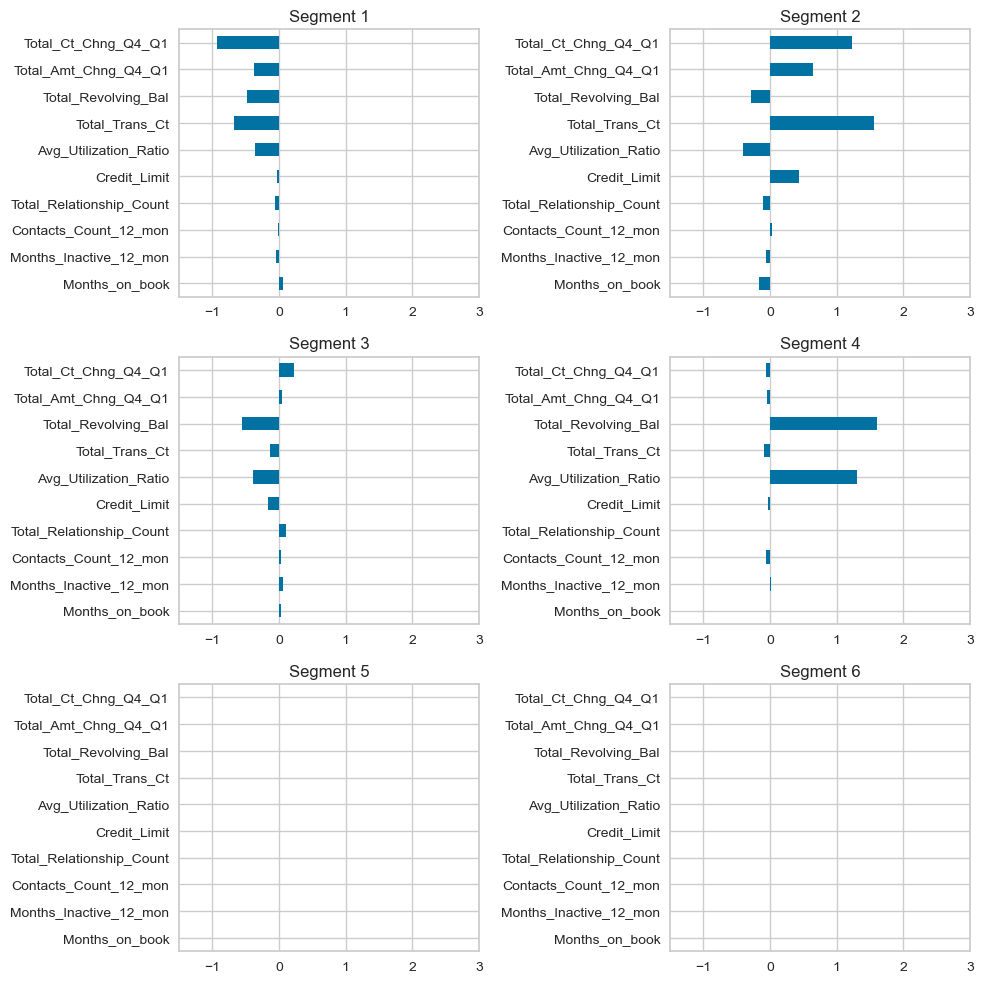

In [140]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(10,10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

df_behv_cluster[df_behv_cluster['customer_group'] == 0][behv_col].mean().plot.barh(ax=axs[0,0], xlim=(-1.5, 3), figsize=(10,10), title='Segment 1')
df_behv_cluster[df_behv_cluster['customer_group'] == 1][behv_col].mean().plot.barh(ax=axs[0,1], xlim=(-1.5, 3), figsize=(10,10), title='Segment 2')
df_behv_cluster[df_behv_cluster['customer_group'] == 2][behv_col].mean().plot.barh(ax=axs[1,0], xlim=(-1.5, 3), figsize=(10,10), title='Segment 3')
df_behv_cluster[df_behv_cluster['customer_group'] == 3][behv_col].mean().plot.barh(ax=axs[1,1], xlim=(-1.5, 3), figsize=(10,10), title='Segment 4')
df_behv_cluster[df_behv_cluster['customer_group'] == 4][behv_col].mean().plot.barh(ax=axs[2,0], xlim=(-1.5, 3), figsize=(10,10), title='Segment 5')
df_behv_cluster[df_behv_cluster['customer_group'] == 5][behv_col].mean().plot.barh(ax=axs[2,1], xlim=(-1.5, 3), figsize=(10,10), title='Segment 6')
plt.tight_layout()